In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# add()함수를 이용해 층을 순차적으로 쌓는 모델
from keras.models import Sequential
# 완전 연결층
from keras.layers import Dense

In [25]:
data = np.random.random((1000,100))
labels = np.random.randint(2,size=(1000,1))

In [26]:
data.shape

(1000, 100)

In [27]:
labels[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

In [28]:
model = Sequential()
#단층 퍼셉트론
model.add(Dense(32,activation='relu',input_dim=100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(data,labels,epochs=10,batch_size=32)
predictions = model.predict(data)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7072 - accuracy: 0.5270
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5420
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5550
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5650
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5800
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5720
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5800
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5730
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.5990
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5990


In [31]:
predictions.shape

(1000, 1)

In [32]:
predictions[:10]

array([[0.6114147 ],
       [0.63144064],
       [0.70841706],
       [0.6352549 ],
       [0.47270226],
       [0.5000984 ],
       [0.7220539 ],
       [0.58395886],
       [0.51354706],
       [0.36216137]], dtype=float32)

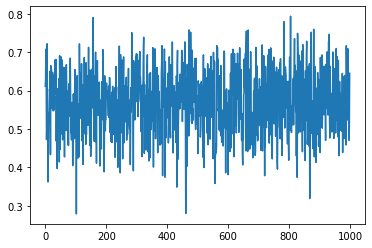

In [36]:
plt.plot(predictions)

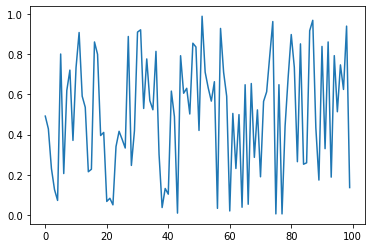

In [37]:
plt.plot(data[0])

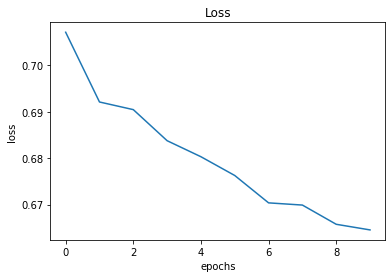

In [39]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

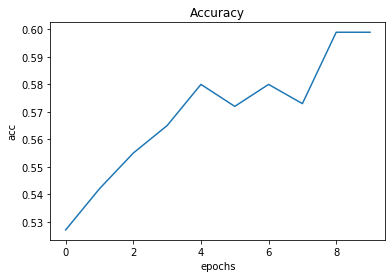

In [41]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()

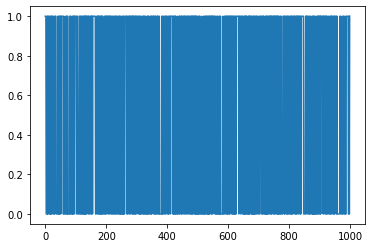

In [43]:
plt.plot(labels)

In [56]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
5


# One-Hot Encoding

In [57]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [58]:
print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Standardization / Normalization 
## 스케일 조절

In [76]:
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

# Multi-Layer-Perceptron(MLP)

## Binary Classification

In [77]:
model = Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='softmax'))

## Multi-Class Classification

In [80]:
from keras.layers import Dropout
model = Sequential()

model.add(Dense(512, activation = 'relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

## Regression

In [81]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1))

# Convolutional Neural Network(CNN)

In [82]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
num_classes = 10
Y_train = to_categorical(y_train,num_classes=10)
Y_test = to_categorical(y_test,num_classes=10)

In [83]:
type(X_train.shape[1:])

tuple

In [84]:
X_train.shape[1:]

(28, 28)

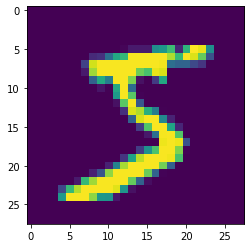

In [85]:
plt.figure()
plt.imshow(X_train[0])
plt.grid(False)
plt.show()

In [86]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

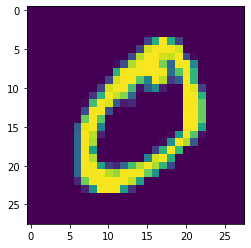

In [87]:
plt.figure()
plt.imshow(X_train[1])
plt.grid(False)
plt.show()

In [88]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [89]:
X_test.shape

(10000, 28, 28)

In [90]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [106]:
X_test.shape

(10000, 28, 28, 1)

The input of imshow can only be a 2D input - grayscale
or a 3D where the last dimension can have 3 ( RGB ) or 4 ( RGBA )
A good idea is to reshape the (x, y, 1) array to (x, y)

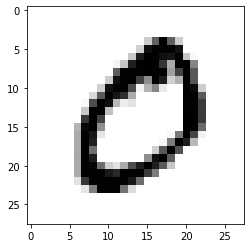

In [97]:
plt.figure()
plt.imshow(X_train[1].reshape(28,28),cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [109]:
# 픽셀 값을 0~1사이로 정규화
tt = X_train[1].reshape(28,28)/255.0

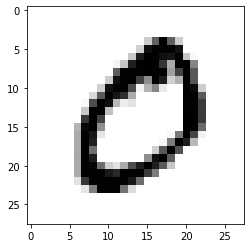

In [99]:
plt.figure()
plt.imshow(tt,cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [112]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,Dropout
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64,(3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [113]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)      

In [114]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [115]:
history = model2.fit(X_train,Y_train,epochs=10,batch_size=32)
predictions = model2.predict(X_test)

Epoch 1/10
1875/1875 [==============================] - 184s 98ms/step - loss: 0.4005 - accuracy: 0.9125
Epoch 2/10
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0955 - accuracy: 0.9713s - loss: 0.0959 - accuracy - ETA: 1s - l
Epoch 3/10
1875/1875 [==============================] - 179s 96ms/step - loss: 0.0787 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 179s 96ms/step - loss: 0.0704 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0637 - accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0593 - accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0578 - accuracy: 0.9833s - los
Epoch 8/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0555 - accuracy: 0.9843
Epoch 9/10
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0503 - accuracy: 0.9858
Epoch 1

In [118]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(history.history['loss'])
print(history.history['accuracy'])

# 6. 모델 평가하기
loss_and_metrics = model2.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

## training loss and acc ##
[0.4004989564418793, 0.09545083343982697, 0.07873479276895523, 0.07042749971151352, 0.06371849030256271, 0.059322480112314224, 0.05778820812702179, 0.055482495576143265, 0.05026012659072876, 0.049005620181560516]
[0.9125333428382874, 0.9712666869163513, 0.9762499928474426, 0.9789999723434448, 0.980983316898346, 0.982366681098938, 0.983299970626831, 0.9843000173568726, 0.9857833385467529, 0.9857833385467529]
313/313 [==============================] - 7s 23ms/step - loss: 0.0321 - accuracy: 0.9911
## evaluation loss and_metrics ##
[0.032106056809425354, 0.991100013256073]


# Recurrent Neural Network(RNN)

In [120]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense

In [121]:
model3 = Sequential()
model3.add(Embedding(20000,128))
model3.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model3.add(Dense(1,activation='sigmoid'))

In [122]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [123]:
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = True))   # return_sequences parameter has to be set True to stack
    model.add(SimpleRNN(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model